In [1]:
import glob
import os
import pandas as pd
import numpy as np

In [2]:
# Ruta a la carpeta con los JSON
dir_CANbus = 'C:/Users/usuario/Desktop/CAF/v1.0-mini_canbus-001/v1.0-mini/can_bus/can_bus'

# Patrón para encontrar archivos tipo scene-0001_vehicle_monitor.json
data_CAN = glob.glob(os.path.join(dir_CANbus, 'scene-*_ms_imu.json'))

In [3]:
import json

# Lista para guardar los resultados
acc_cent = []

# Procesar cada archivo
for archivo in data_CAN:
    with open(archivo, 'r') as f:
        contenido = json.load(f)
        for registro in contenido:
            if "linear_accel" in registro and "utime" in registro:
                y_accel = registro["linear_accel"][1]
                utime = registro["utime"]
                acc_cent.append({"utime": utime, "linear_accel_y": y_accel})


# Le añado un índice

for i, registro in enumerate(acc_cent):
    registro['index'] = i


# Mostrar un ejemplo del diccionario que se ha creado

for d in acc_cent[:5]:
    print(d)

{'utime': 1531883530454603, 'linear_accel_y': 1.1019431352615356, 'index': 0}
{'utime': 1531883530464610, 'linear_accel_y': 1.1640546321868896, 'index': 1}
{'utime': 1531883530474590, 'linear_accel_y': 1.2107515335083008, 'index': 2}
{'utime': 1531883530484591, 'linear_accel_y': 1.168063998222351, 'index': 3}
{'utime': 1531883530495540, 'linear_accel_y': 1.2796555757522583, 'index': 4}


In [4]:
print(np.__version__)


1.24.4


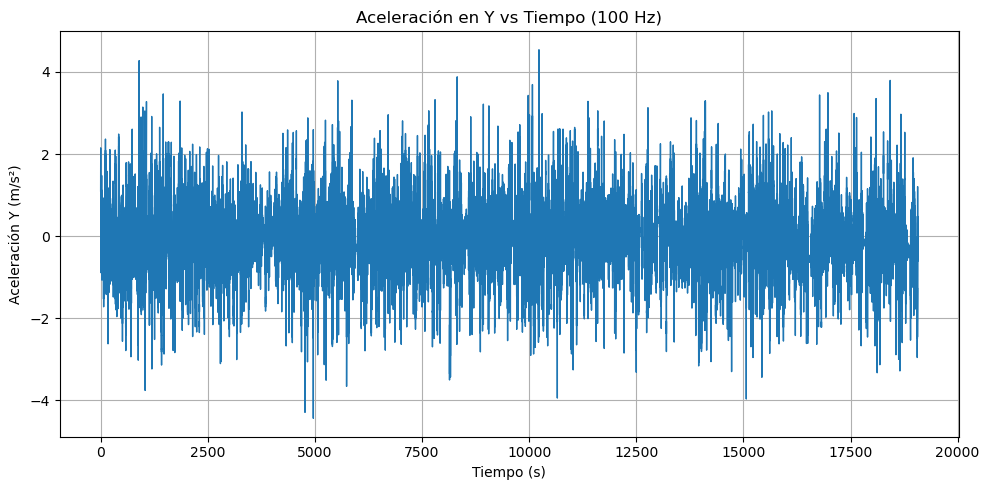

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(acc_cent)

# Creamos eje de tiempo en segundos con paso de 0.01s (100 Hz)
df['tiempo_s'] = df['index'] * 0.01

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(df['tiempo_s'], df['linear_accel_y'], linewidth=1)

plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración Y (m/s²)')
plt.title('Aceleración en Y vs Tiempo (100 Hz)')
plt.grid(True)
plt.tight_layout()
plt.show()

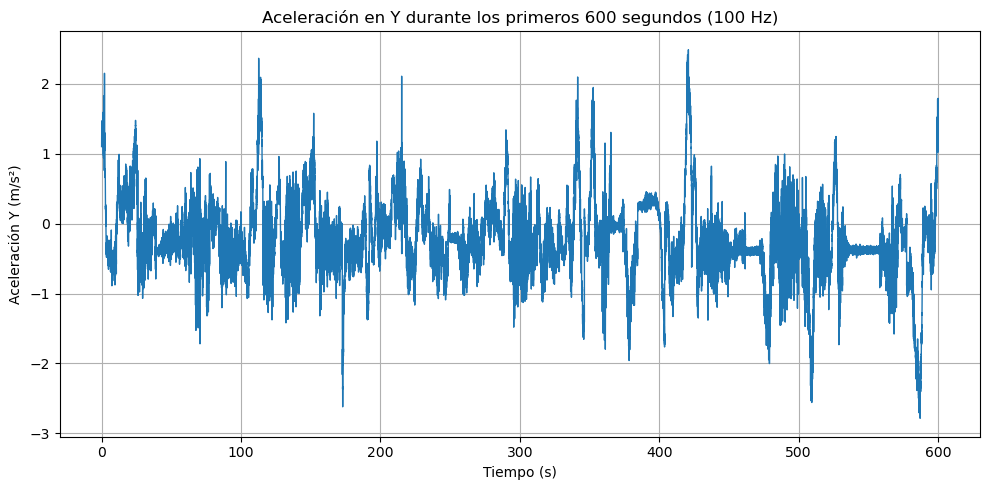

In [7]:
# Filtrar las muestras dentro de los primeros 600 segundos
df_600 = df[df['tiempo_s'] <= 600]

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(df_600['tiempo_s'], df_600['linear_accel_y'], linewidth=1)

plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración Y (m/s²)')
plt.title('Aceleración en Y durante los primeros 600 segundos (100 Hz)')
plt.grid(True)
plt.tight_layout()
plt.show()


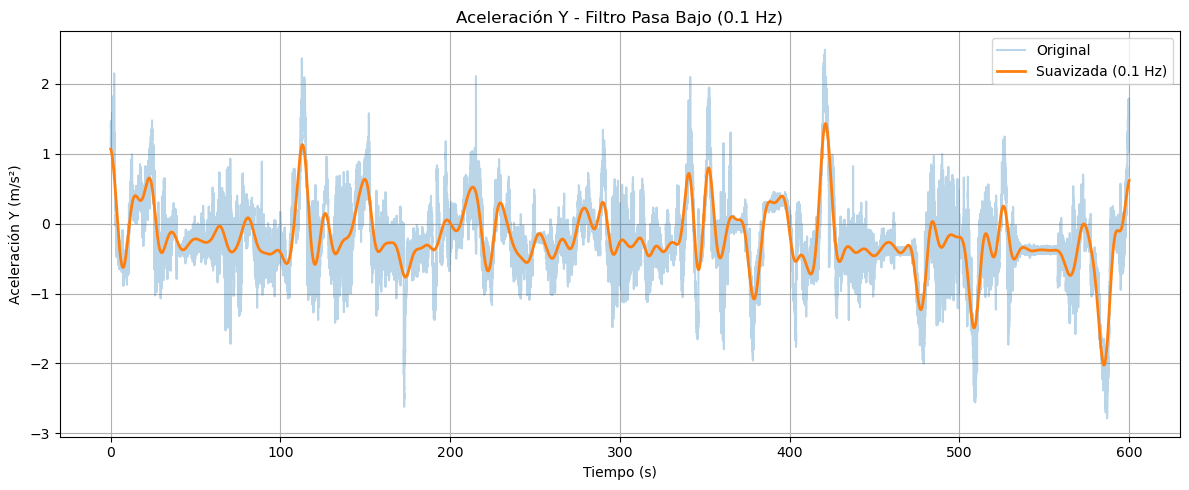

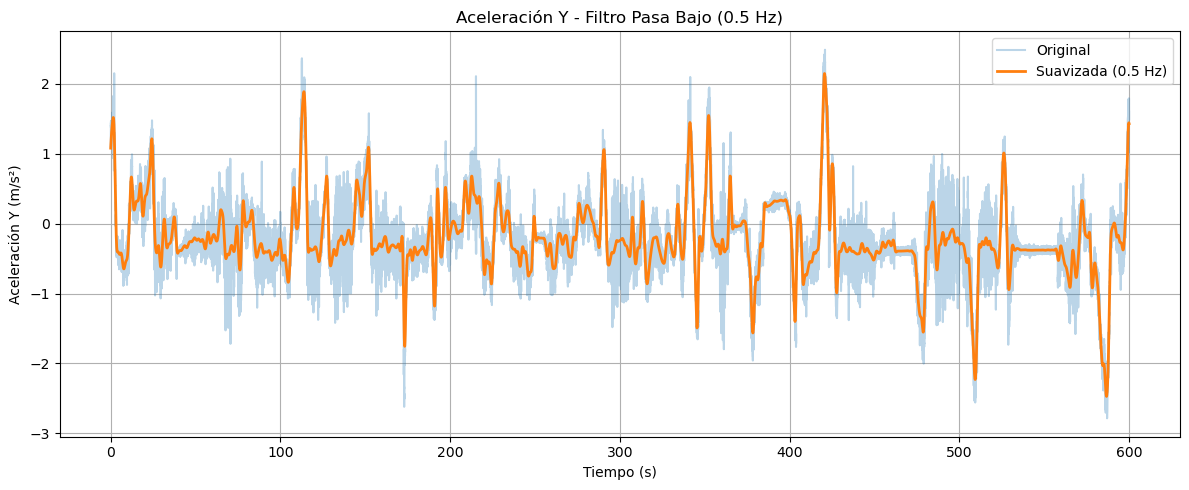

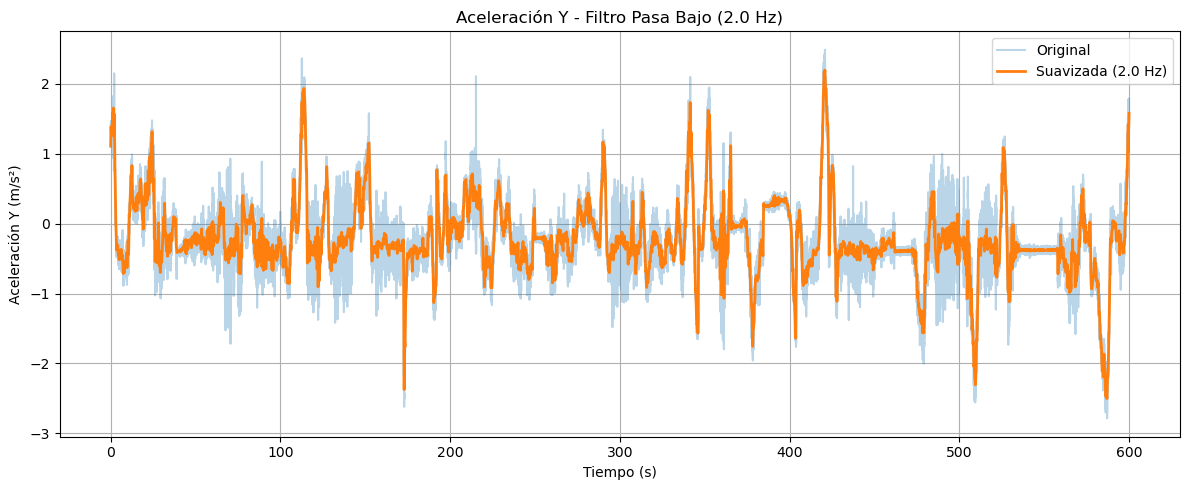

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parámetros
fs = 100      # Frecuencia de muestreo (Hz)
order = 4     # Orden del filtro
cutoffs = [0.1, 0.5, 2.0]  # Frecuencias de corte en Hz

# Aplicar filtros y graficar por separado
for cutoff in cutoffs:
    # Diseñar filtro Butterworth
    b, a = butter(order, cutoff / (0.5 * fs), btype='low')

    # Filtrar señal
    df[f'suavizada_{cutoff}Hz'] = filtfilt(b, a, df['linear_accel_y'])

    # Filtrar solo los primeros 600 s
    df_plot = df[df['tiempo_s'] <= 600]

    # Graficar
    plt.figure(figsize=(12, 5))
    plt.plot(df_plot['tiempo_s'], df_plot['linear_accel_y'], label='Original', alpha=0.3)
    plt.plot(df_plot['tiempo_s'], df_plot[f'suavizada_{cutoff}Hz'], label=f'Suavizada ({cutoff} Hz)', linewidth=2)
    
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Aceleración Y (m/s²)')
    plt.title(f'Aceleración Y - Filtro Pasa Bajo ({cutoff} Hz)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
